# K-Nearest-Neighbors


In [2]:
import pandas as pd

df = pd.read_csv('data/houses_clean.csv')
df.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000


In [3]:
df.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


# Default KNN

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

X = df.drop(columns = ['SalePrice'])
y = df.SalePrice

# Instanciate the model
knn_model = KNeighborsRegressor()

# Train the model on the scaled Training data
cv_results = cross_validate(knn_model, X,y)

base_knn_score = cv_results['test_score'].mean()

base_knn_score

np.float64(0.6085640394084016)

# Scale sensitivity

KNNs and distance-based algorithms can be extremely sensitive to the scale of the features. 



`MinMaxScaler()`

Even though only `GrLiveArea` needs to be normalized, using the MinxMaxScaler on all your features is fine  
    
Indeed, Min-Max Scaling is an [idempotent](https://en.wikipedia.org/wiki/Idempotence) transformation: if $X_{max}=1$ and $X_{min}=0$, then $X = \frac{X - X_{min}}{X_{max} - X_{min}}$


In [31]:
X.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir
0,0.380070,0.375,0.333333,0.500,1
1,-0.312090,0.375,0.333333,0.875,1
2,0.497489,0.375,0.333333,0.500,1
3,0.390885,0.375,0.333333,0.500,1
4,1.134029,0.500,0.333333,0.500,1


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_rescaled = scaler.fit_transform(X)

cv_results = cross_validate(knn_model, X_rescaled,y)

rescaled_score = cv_results['test_score'].mean()

rescaled_score

np.float64(0.6496841000103444)

# Optimizing  𝑘
 

👇 Fine tune the parameter K (using the parameter n_neighbors) of a KNNRegressor on the rescaled features. Plot the evolution of the score as K increases from 1 until 25.

In [14]:
score = []
neighbours = []

for k in range(1,25):
    
    # Instanciate the model
    knn_model = KNeighborsRegressor(n_neighbors = k)

    # Train the model on the scaled Training data
    cv_results = cross_validate(knn_model, X_rescaled,y)

    # Append the score and k
    score.append(cv_results['test_score'].mean())
    neighbours.append(k)

In [28]:
score

[np.float64(0.48643978631100937),
 np.float64(0.6267417341431845),
 np.float64(0.6361131968558427),
 np.float64(0.6424218015704231),
 np.float64(0.6496841000103444),
 np.float64(0.6522754507028157),
 np.float64(0.652839334921044),
 np.float64(0.6519261906963425),
 np.float64(0.6554831582849612),
 np.float64(0.654649718853763),
 np.float64(0.6571094901627201),
 np.float64(0.6547622648461493),
 np.float64(0.6559293474292767),
 np.float64(0.6531144861475239),
 np.float64(0.6506644507844749),
 np.float64(0.6510587444798077),
 np.float64(0.648992334002443),
 np.float64(0.6468309968654011),
 np.float64(0.6434622558331211),
 np.float64(0.6426314978289545),
 np.float64(0.641230517625335),
 np.float64(0.6396124217700394),
 np.float64(0.6379363773825212),
 np.float64(0.6360964020468971)]

0.6571094901627201


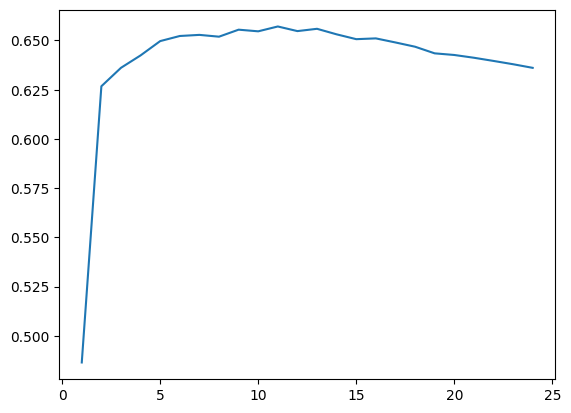

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# plot_data = []
# for k in neighbours:
# #     print(score[k])
#     plot_data.append(score[k])
#     print(k)
#     print(calculate_score(k))

print(np.max(score))
plt.plot(neighbours, score)
plt.show()

👉 By looking at the graph, the score stops increasing around k = 5 and the maximum score is reached for k = 11.

👉 When K is too small, the model will tend to overfit to the training set. It will focus on too few points to be able to generalize well. Increasing K will give the model more examples to base its predictions on.

# Overfitting a KNN

💡 When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well. 

👇 Plot the learning curves of a KNN with parameter K=2.

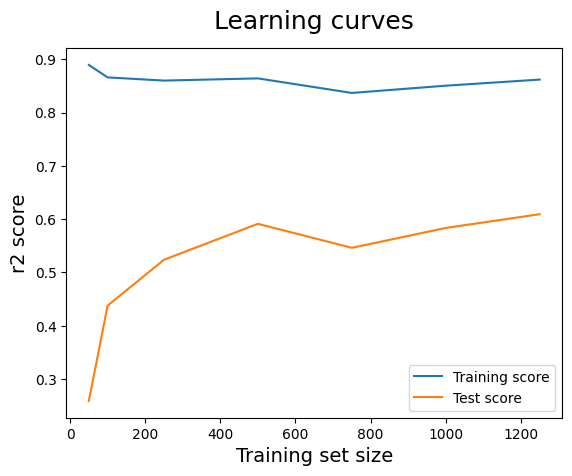

In [29]:
from sklearn.model_selection import learning_curve

K=2

train_sizes = [50,100,250,500,750,1000,1250]

train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsRegressor(n_neighbors=K), X=X_rescaled, y=y, train_sizes=train_sizes, cv=10, scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

👉 You should observe a high training score, but a low testing score. ⚠️ Overfitting alert ⚠️ This is due to a parameter K that is too low.

# Ideal K

👇 Plot the learning curves for the ideal K value you found in the "Optimizing  𝑘
 " section.

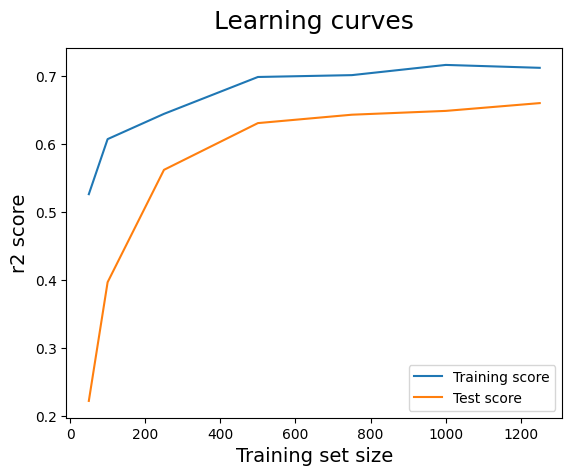

In [30]:
from sklearn.model_selection import learning_curve

K=11

train_sizes = [50,100,250,500,750,1000,1250],
train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsRegressor(n_neighbors=K), X=X_rescaled, y=y, train_sizes=train_sizes, cv=10, scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

👉 The curves should be close to converging, which indicates that the model is overfitting less and generalizing better.

💡 There are two key elements to remember when modelling with KNN models:
1. Distance-based algorithms are extremely sensitive to the scale of features
2. K must be tuned: it controls the tradeoff between performance, generalization, and overfitting

## Negative Mean Absolute Error (MAE)

In [33]:
best_k = 11

cv_results = cross_validate(KNeighborsRegressor(n_neighbors=best_k), X_rescaled,y, scoring = 'neg_mean_absolute_error')

price_error = cv_results['test_score'].mean()

price_error

np.float64(-30819.016376089665)

# Model Selection

Which is better :

- KNN model
- Linear Regression model

## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression() # Instanciate Linear Regression

cv_results_linear = cross_validate(lin_model, X_rescaled,y, scoring = 'neg_mean_absolute_error') # Cross validate

linear_model_score = cv_results_linear['test_score'].mean()  # Mean of scores

linear_model_score


np.float64(-33586.16906310636)

👉  KNN model should outperform the Linear Regression. This could be due to its ability to capture non-linear patterns in the data.